<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Pie Charts**


Estimated time needed: **30** minutes


- In this lab, you will focus on visualizing data.

- The provided dataset will be loaded into pandas for analysis.

- Various pie charts will be created to:
   - Analyze developer preferences.
  
   - Identify technology usage trends.
    
- The lab aims to provide insights into key variables using visual representations.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-04-19 02:12:45--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
169.63.118.104ourses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  60.0MB/s    in 2.5s    

2025-04-19 02:12:48 (60.0 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Composition with Pie Charts


##### 1.1 Create a Pie Chart of the Top 5 Databases Respondents Want to Work With


In the survey data, the `DatabaseWantToWorkWith` column lists the databases that respondents wish to work with. Let’s visualize the top 5 most-desired databases in a pie chart.




--- Generating: Pie Chart - Top 5 Desired Databases ---
Total individual database preferences counted: 127439

Top 5 desired databases (plus Others):
PostgreSQL    24005
SQLite        13489
MySQL         12269
MongoDB       10982
Redis         10847
Others        55847
dtype: int64


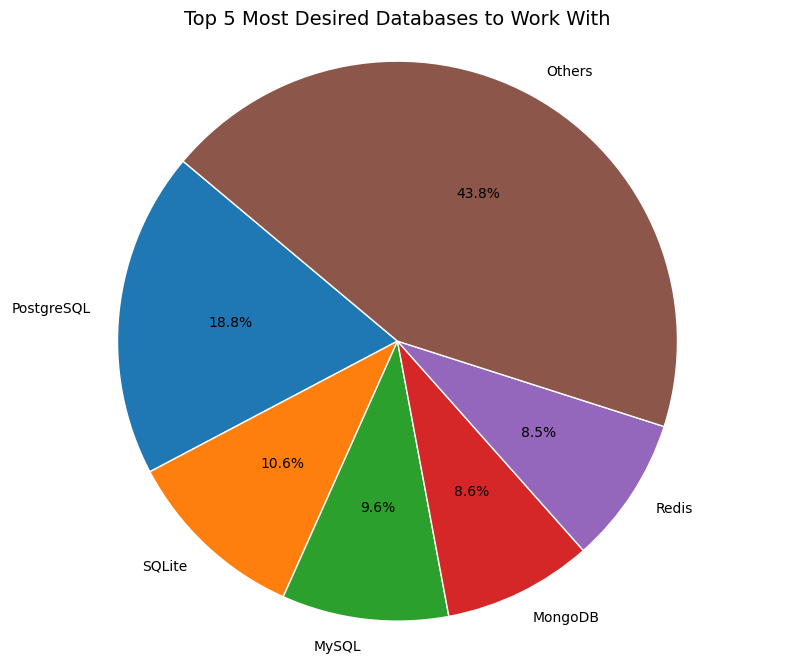

In [4]:
##Write your code here
# --- Pie Chart of Top 5 Desired Databases ---
print("\n--- Generating: Pie Chart - Top 5 Desired Databases ---")

database_col = 'DatabaseWantToWorkWith'

if database_col in df.columns:

    # 1. Prepare Data
    # Select the column and drop missing values
    db_preferences = df[database_col].dropna().astype(str)

    # 2. Split and Explode the lists of databases
    # Use Series string methods for splitting and then explode
    db_split = db_preferences.str.split(';')
    db_individual = db_split.explode()

    # 3. Clean individual database names
    db_individual = db_individual.str.strip()
    # Remove empty strings and potential 'nan' strings resulting from split/cleaning
    db_individual = db_individual[(db_individual != '') & (db_individual.str.lower() != 'nan')]
    print(f"Total individual database preferences counted: {len(db_individual)}")

    # 4. Count the frequency of each database
    db_counts = db_individual.value_counts()

    # 5. Identify Top 5 and Calculate "Others"
    top_n = 5
    if len(db_counts) > top_n:
        top_db = db_counts.nlargest(top_n)
        # Sum frequencies of all databases NOT in the top N
        others_count = db_counts.iloc[top_n:].sum()
        # Create data for the pie chart
        pie_data = pd.concat([top_db, pd.Series({'Others': others_count})])
        print(f"\nTop {top_n} desired databases (plus Others):")
        print(pie_data)
    elif len(db_counts) > 0:
         # Handle case where there are <= top_n databases total
        pie_data = db_counts
        print(f"\nFound {len(pie_data)} desired databases (fewer than {top_n}):")
        print(pie_data)
    else:
        pie_data = pd.Series() # Empty series
        print("No valid database preferences found to plot.")


    # 6. Create the Pie Chart
    if not pie_data.empty:
        plt.figure(figsize=(10, 8))
        plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=140,
                # Optional: add some styling
                wedgeprops={'edgecolor': 'white'},
                textprops={'fontsize': 10}
               )
        plt.title(f'Top {min(top_n, len(db_counts))} Most Desired Databases to Work With', fontsize=14)
        plt.ylabel('') # Hide the default 'Frequency' label on the y-axis for pie charts
        plt.axis('equal') # Ensures the pie chart is circular
        plt.show()
    else:
        print("Skipping pie chart generation as no data is available.")


else:
    print(f"Pie chart skipped: Required column '{database_col}' not found.")

The `DevType` column lists the developer types for respondents. We’ll examine the distribution by showing the top 5 developer roles in a pie chart.




--- Generating: Pie Chart - Top 5 Developer Types ---
Total individual developer type entries counted: 59445

Top 5 Developer Types (plus Others):
Developer, full-stack                            18260
Developer, back-end                               9928
Student                                           5102
Developer, front-end                              3349
Developer, desktop or enterprise applications     2493
Other Roles                                      20313
dtype: int64


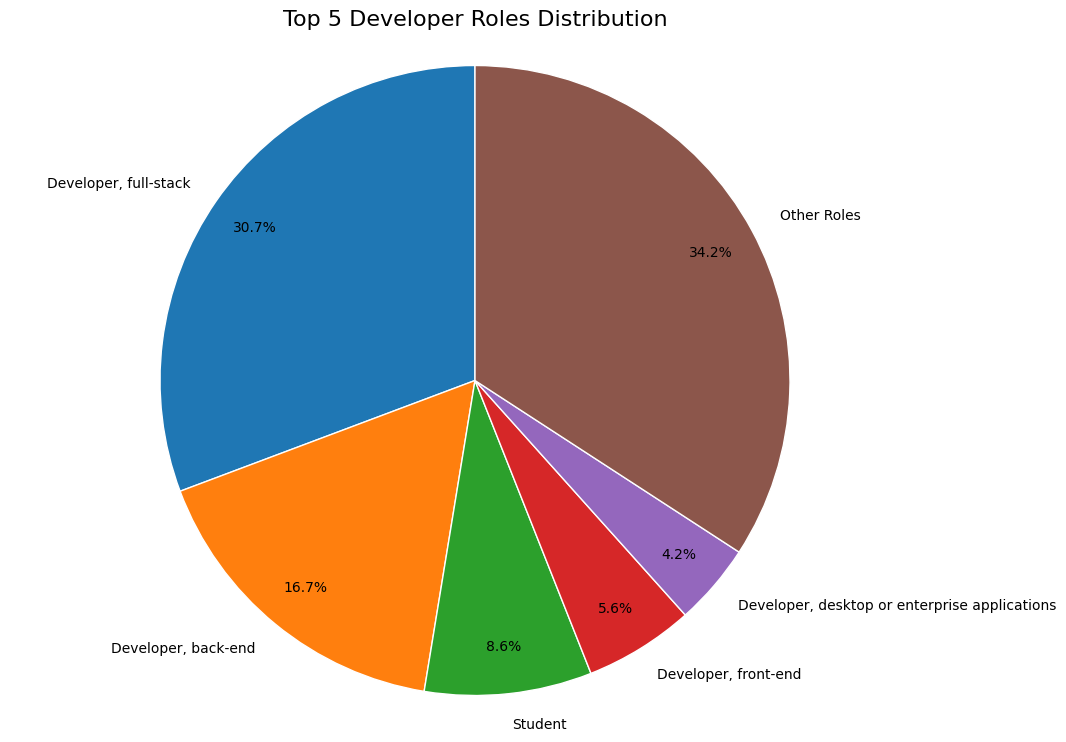

In [5]:
##Write your code here
# --- Pie Chart of Top 5 Developer Types ---
print("\n--- Generating: Pie Chart - Top 5 Developer Types ---")

dev_type_col = 'DevType'

if dev_type_col in df.columns:

    # 1. Prepare Data
    # Select the column, ensure string type, and drop missing values
    dev_types = df[dev_type_col].dropna().astype(str)

    # 2. Split and Explode the lists of developer types
    dev_split = dev_types.str.split(';')
    dev_individual = dev_split.explode()

    # 3. Clean individual role names
    dev_individual = dev_individual.str.strip()
    # Remove empty strings and potential 'nan' strings
    dev_individual = dev_individual[(dev_individual != '') & (dev_individual.str.lower() != 'nan')]
    print(f"Total individual developer type entries counted: {len(dev_individual)}")

    # 4. Count the frequency of each developer type
    dev_counts = dev_individual.value_counts()

    # 5. Identify Top 5 and Calculate "Others"
    top_n = 5
    if len(dev_counts) > top_n:
        top_dev = dev_counts.nlargest(top_n)
        # Sum frequencies of all roles NOT in the top N
        others_count = dev_counts.iloc[top_n:].sum()
        # Create data for the pie chart
        pie_data_dev = pd.concat([top_dev, pd.Series({'Other Roles': others_count})])
        print(f"\nTop {top_n} Developer Types (plus Others):")
        print(pie_data_dev)
    elif len(dev_counts) > 0:
         # Handle case where there are <= top_n roles total
        pie_data_dev = dev_counts
        print(f"\nFound {len(pie_data_dev)} Developer Types (fewer than {top_n}):")
        print(pie_data_dev)
    else:
        pie_data_dev = pd.Series() # Empty series
        print("No valid developer types found to plot.")


    # 6. Create the Pie Chart
    if not pie_data_dev.empty:
        plt.figure(figsize=(12, 9)) # Slightly larger figure
        wedges, texts, autotexts = plt.pie(
            pie_data_dev,
            labels=pie_data_dev.index,
            autopct='%1.1f%%',
            startangle=90, # Start the first slice at the top
            # Optional styling:
            pctdistance=0.85, # Distance of percentage labels from center
            wedgeprops={'edgecolor': 'white', 'linewidth': 1},
            textprops={'fontsize': 10}
        )
        plt.title(f'Top {min(top_n, len(dev_counts))} Developer Roles Distribution', fontsize=16)
        plt.ylabel('') # Hide the default 'Frequency' label on the y-axis
        plt.axis('equal') # Ensures the pie chart is circular

        # Optional: Improve label readability if overlapping
        # plt.setp(autotexts, size=8, weight="bold", color='white') # Example styling for percentages

        plt.show()
    else:
        print("Skipping pie chart generation as no data is available.")

else:
    print(f"Pie chart skipped: Required column '{dev_type_col}' not found.")

##### 1.3 Create a pie chart for the operating systems used by respondents for professional use


The `OpSysProfessional` use column shows the operating systems developers use professionally. Let’s visualize the distribution of the top operating systems in a pie chart.




--- Generating: Pie Chart - Top 5 Professional Use OS ---
Total individual professional OS entries counted: 104243

Top 5 Professional Use OS (plus Others):
Windows                              27918
MacOS                                18625
Ubuntu                               16237
Windows Subsystem for Linux (WSL)     9859
Debian                                5327
Others                               26277
dtype: int64


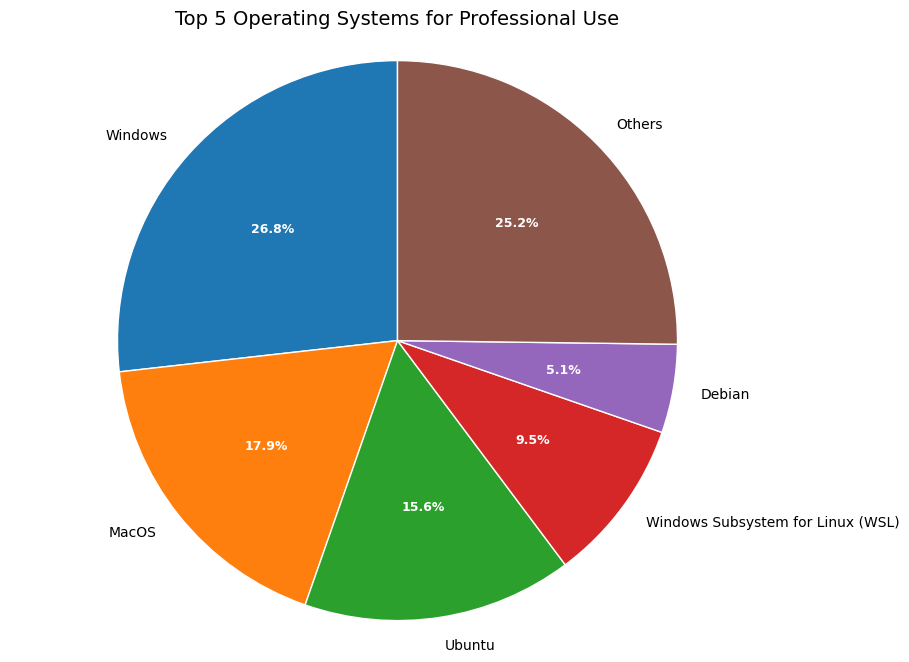

In [6]:
##Write your code here
# --- Pie Chart of Top 5 Professional Use Operating Systems ---
print("\n--- Generating: Pie Chart - Top 5 Professional Use OS ---")

os_col = 'OpSysProfessional use' # Column name for professional OS use

if os_col in df.columns:

    # 1. Prepare Data
    # Select the column, ensure string type, and drop missing values
    os_data = df[os_col].dropna().astype(str)

    # 2. Split and Explode the lists of operating systems
    os_split = os_data.str.split(';')
    os_individual = os_split.explode()

    # 3. Clean individual OS names
    os_individual = os_individual.str.strip()
    # Remove empty strings and potential 'nan' strings
    os_individual = os_individual[(os_individual != '') & (os_individual.str.lower() != 'nan')]
    print(f"Total individual professional OS entries counted: {len(os_individual)}")

    # 4. Count the frequency of each OS
    os_counts = os_individual.value_counts()

    # 5. Identify Top 5 and Calculate "Others"
    top_n = 5
    if len(os_counts) > top_n:
        top_os = os_counts.nlargest(top_n)
        # Sum frequencies of all OS NOT in the top N
        others_count = os_counts.iloc[top_n:].sum()
        # Create data for the pie chart
        pie_data_os = pd.concat([top_os, pd.Series({'Others': others_count})])
        print(f"\nTop {top_n} Professional Use OS (plus Others):")
        print(pie_data_os)
    elif len(os_counts) > 0:
         # Handle case where there are <= top_n OS total
        pie_data_os = os_counts
        print(f"\nFound {len(pie_data_os)} Professional Use OS (fewer than {top_n}):")
        print(pie_data_os)
    else:
        pie_data_os = pd.Series() # Empty series
        print("No valid professional use OS entries found to plot.")


    # 6. Create the Pie Chart
    if not pie_data_os.empty:
        plt.figure(figsize=(10, 8))
        # Define custom colors perhaps, or let matplotlib choose
        # colors = plt.cm.Paired(np.linspace(0, 1, len(pie_data_os))) # Example colormap

        wedges, texts, autotexts = plt.pie(
            pie_data_os,
            labels=pie_data_os.index,
            autopct='%1.1f%%',
            startangle=90, # Start the largest slice at the top
            # colors=colors, # Apply custom colors if defined
            wedgeprops={'edgecolor': 'white'} # Add edge lines to slices
        )
        plt.title(f'Top {min(top_n, len(os_counts))} Operating Systems for Professional Use', fontsize=14)
        plt.ylabel('') # Hide the default y-axis label
        plt.axis('equal') # Ensure the pie chart is circular

        # Optional: Improve label appearance
        plt.setp(texts, size=10)
        plt.setp(autotexts, size=9, color="white", weight="bold") # Style percentages

        plt.show()
    else:
        print("Skipping pie chart generation as no data is available.")


else:
    print(f"Pie chart skipped: Required column '{os_col}' not found.")

### Task 2: Additional Visualizations and Comparisons


##### 2.1 Pie Chart for Top 5 Programming Languages Respondents Have Worked With


The `LanguageHaveWorkedWith` column contains the programming languages that respondents have experience with. We’ll plot a pie chart to display the composition of the top 5 languages.




--- Generating: Pie Chart - Top 5 Languages Worked With ---
Total individual language entries (worked with) counted: 322233

Top 5 Languages Worked With (plus Others):
JavaScript          37492
HTML/CSS            31816
Python              30719
SQL                 30682
TypeScript          23150
Other Languages    168374
dtype: int64


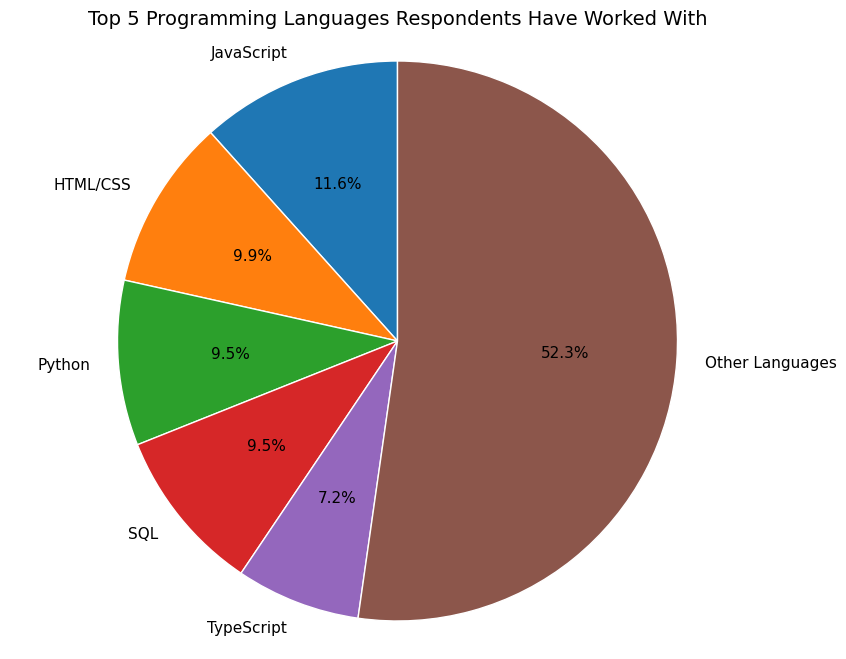

In [7]:
##Write your code here
# --- Pie Chart of Top 5 Programming Languages Worked With ---
print("\n--- Generating: Pie Chart - Top 5 Languages Worked With ---")

language_col = 'LanguageHaveWorkedWith'

if language_col in df.columns:

    # 1. Prepare Data
    # Select the column, ensure string type, and drop missing values
    lang_data = df[language_col].dropna().astype(str)

    # 2. Split and Explode the lists of languages
    lang_split = lang_data.str.split(';')
    lang_individual = lang_split.explode()

    # 3. Clean individual language names
    lang_individual = lang_individual.str.strip()
    # Remove empty strings and potential 'nan' strings
    lang_individual = lang_individual[(lang_individual != '') & (lang_individual.str.lower() != 'nan')]
    print(f"Total individual language entries (worked with) counted: {len(lang_individual)}")

    # 4. Count the frequency of each language
    lang_counts = lang_individual.value_counts()

    # 5. Identify Top 5 and Calculate "Others"
    top_n = 5
    if len(lang_counts) > top_n:
        top_lang = lang_counts.nlargest(top_n)
        # Sum frequencies of all languages NOT in the top N
        others_count = lang_counts.iloc[top_n:].sum()
        # Create data for the pie chart
        pie_data_lang = pd.concat([top_lang, pd.Series({'Other Languages': others_count})])
        print(f"\nTop {top_n} Languages Worked With (plus Others):")
        print(pie_data_lang)
    elif len(lang_counts) > 0:
         # Handle case where there are <= top_n languages total
        pie_data_lang = lang_counts
        print(f"\nFound {len(pie_data_lang)} Languages Worked With (fewer than {top_n}):")
        print(pie_data_lang)
    else:
        pie_data_lang = pd.Series() # Empty series
        print("No valid language entries (worked with) found to plot.")


    # 6. Create the Pie Chart
    if not pie_data_lang.empty:
        plt.figure(figsize=(10, 8))
        wedges, texts, autotexts = plt.pie(
            pie_data_lang,
            labels=pie_data_lang.index,
            autopct='%1.1f%%',
            startangle=90,
            wedgeprops={'edgecolor': 'white'},
             textprops={'fontsize': 11} # Slightly larger font for labels
        )
        plt.title(f'Top {min(top_n, len(lang_counts))} Programming Languages Respondents Have Worked With', fontsize=14)
        plt.ylabel('') # Hide the default y-axis label
        plt.axis('equal') # Ensure the pie chart is circular

        plt.show()
    else:
        print("Skipping pie chart generation as no data is available.")


else:
    print(f"Pie chart skipped: Required column '{language_col}' not found.")

##### 2.2 Pie Chart for Top Collaboration Tools used in Professional Use


Using the `NEWCollabToolsHaveWorkedWith` column, we’ll identify and visualize the top collaboration tools respondents use in their professional work.




--- Generating: Pie Chart - Top 5 Collaboration Tools ---
Total individual collaboration tool entries counted: 196236

Top 5 Collaboration Tools (plus Others):
Visual Studio Code    42751
Visual Studio         17021
IntelliJ IDEA         15555
Notepad++             13874
Vim                   12523
Other Tools           94512
dtype: int64


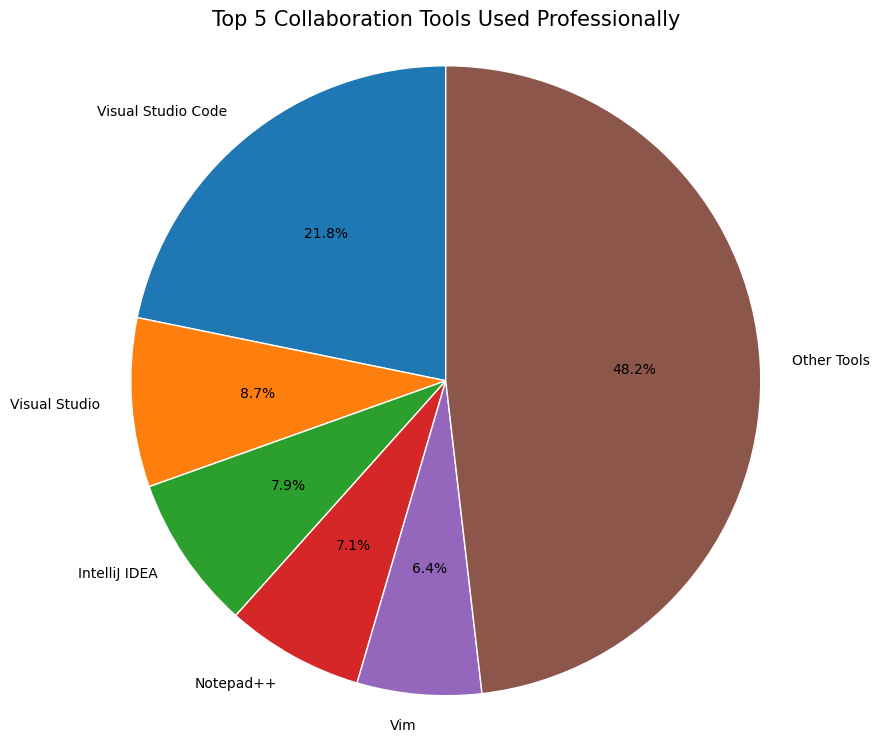

In [8]:
##Write your code here
# --- Pie Chart of Top 5 Collaboration Tools Used Professionally ---
print("\n--- Generating: Pie Chart - Top 5 Collaboration Tools ---")

collab_tool_col = 'NEWCollabToolsHaveWorkedWith'

if collab_tool_col in df.columns:

    # 1. Prepare Data
    # Select the column, ensure string type, and drop missing values
    tool_data = df[collab_tool_col].dropna().astype(str)

    # 2. Split and Explode the lists of collaboration tools
    tool_split = tool_data.str.split(';')
    tool_individual = tool_split.explode()

    # 3. Clean individual tool names
    tool_individual = tool_individual.str.strip()
    # Remove empty strings and potential 'nan' strings
    tool_individual = tool_individual[(tool_individual != '') & (tool_individual.str.lower() != 'nan')]
    print(f"Total individual collaboration tool entries counted: {len(tool_individual)}")

    # 4. Count the frequency of each tool
    tool_counts = tool_individual.value_counts()

    # 5. Identify Top 5 and Calculate "Others"
    top_n = 5
    if len(tool_counts) > top_n:
        top_tools = tool_counts.nlargest(top_n)
        # Sum frequencies of all tools NOT in the top N
        others_count = tool_counts.iloc[top_n:].sum()
        # Create data for the pie chart
        pie_data_tools = pd.concat([top_tools, pd.Series({'Other Tools': others_count})])
        print(f"\nTop {top_n} Collaboration Tools (plus Others):")
        print(pie_data_tools)
    elif len(tool_counts) > 0:
         # Handle case where there are <= top_n tools total
        pie_data_tools = tool_counts
        print(f"\nFound {len(pie_data_tools)} Collaboration Tools (fewer than {top_n}):")
        print(pie_data_tools)
    else:
        pie_data_tools = pd.Series() # Empty series
        print("No valid collaboration tool entries found to plot.")


    # 6. Create the Pie Chart
    if not pie_data_tools.empty:
        plt.figure(figsize=(11, 9)) # Adjust size if needed
        wedges, texts, autotexts = plt.pie(
            pie_data_tools,
            labels=pie_data_tools.index,
            autopct='%1.1f%%',
            startangle=90,
            wedgeprops={'edgecolor': 'white'},
            textprops={'fontsize': 10}
        )
        plt.title(f'Top {min(top_n, len(tool_counts))} Collaboration Tools Used Professionally', fontsize=15)
        plt.ylabel('') # Hide the default y-axis label
        plt.axis('equal') # Ensure the pie chart is circular

        plt.show()
    else:
        print("Skipping pie chart generation as no data is available.")


else:
    print(f"Pie chart skipped: Required column '{collab_tool_col}' not found.")

### Task 3: Analyzing and Interpreting Composition


In this task, you will create additional pie charts to analyze specific aspects of the survey data. Use `pandas` and `matplotlib` to complete each task and interpret the findings.



##### 3.1 Pie Chart of `Respondents` Most Admired Programming Languages


The `LanguageAdmired` column lists the programming languages respondents admire most. Create a pie chart to visualize the top 5 admired languages.




--- Generating: Pie Chart - Top 5 Admired Languages ---
Total individual admired language entries counted: 189203

Top 5 Admired Languages (plus Others):
JavaScript       21869
Python           20774
SQL              20692
HTML/CSS         19851
TypeScript       16079
Other Admired    89938
dtype: int64


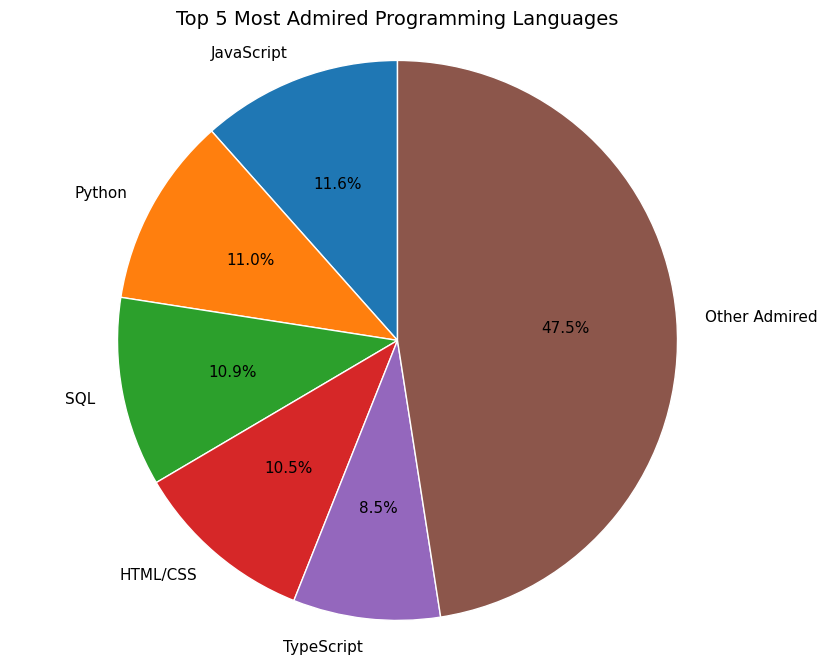

In [9]:
##Write your code here
# --- Pie Chart of Top 5 Admired Programming Languages ---
print("\n--- Generating: Pie Chart - Top 5 Admired Languages ---")

admired_lang_col = 'LanguageAdmired'

if admired_lang_col in df.columns:

    # 1. Prepare Data
    # Select the column, ensure string type, and drop missing values
    admired_data = df[admired_lang_col].dropna().astype(str)

    # 2. Split and Explode the lists of admired languages
    lang_split = admired_data.str.split(';')
    lang_individual = lang_split.explode()

    # 3. Clean individual language names
    lang_individual = lang_individual.str.strip()
    # Remove empty strings and potential 'nan' strings
    lang_individual = lang_individual[(lang_individual != '') & (lang_individual.str.lower() != 'nan')]
    print(f"Total individual admired language entries counted: {len(lang_individual)}")

    # 4. Count the frequency of each admired language
    lang_admired_counts = lang_individual.value_counts()

    # 5. Identify Top 5 and Calculate "Others"
    top_n = 5
    if len(lang_admired_counts) > top_n:
        top_admired = lang_admired_counts.nlargest(top_n)
        # Sum frequencies of all languages NOT in the top N
        others_count = lang_admired_counts.iloc[top_n:].sum()
        # Create data for the pie chart
        pie_data_admired = pd.concat([top_admired, pd.Series({'Other Admired': others_count})])
        print(f"\nTop {top_n} Admired Languages (plus Others):")
        print(pie_data_admired)
    elif len(lang_admired_counts) > 0:
         # Handle case where there are <= top_n languages total
        pie_data_admired = lang_admired_counts
        print(f"\nFound {len(pie_data_admired)} Admired Languages (fewer than {top_n}):")
        print(pie_data_admired)
    else:
        pie_data_admired = pd.Series() # Empty series
        print("No valid admired language entries found to plot.")


    # 6. Create the Pie Chart
    if not pie_data_admired.empty:
        plt.figure(figsize=(10, 8))
        wedges, texts, autotexts = plt.pie(
            pie_data_admired,
            labels=pie_data_admired.index,
            autopct='%1.1f%%',
            startangle=90,
            wedgeprops={'edgecolor': 'white'},
             textprops={'fontsize': 11}
        )
        plt.title(f'Top {min(top_n, len(lang_admired_counts))} Most Admired Programming Languages', fontsize=14)
        plt.ylabel('') # Hide the default y-axis label
        plt.axis('equal') # Ensure the pie chart is circular

        plt.show()
    else:
        print("Skipping pie chart generation as no data is available.")


else:
    print(f"Pie chart skipped: Required column '{admired_lang_col}' not found.")


##### 3.2 Pie Chart of Tools Used for AI Development


Using the `AIToolCurrently` Using column, create a pie chart to visualize the top 5 tools developers are currently using for AI development.




--- Generating: Pie Chart - Top 5 AI Tools Currently Using ---
Splitting multiple tools listed per respondent...
Total individual AI tool (currently using) entries counted: 135131

Top 5 AI Tools Currently Using (plus Others):
Writing code                            29486
Search for answers                      24295
Debugging and getting help              20404
Documenting code                        14439
Generating content or synthetic data    12538
Other AI Tools                          33969
dtype: int64


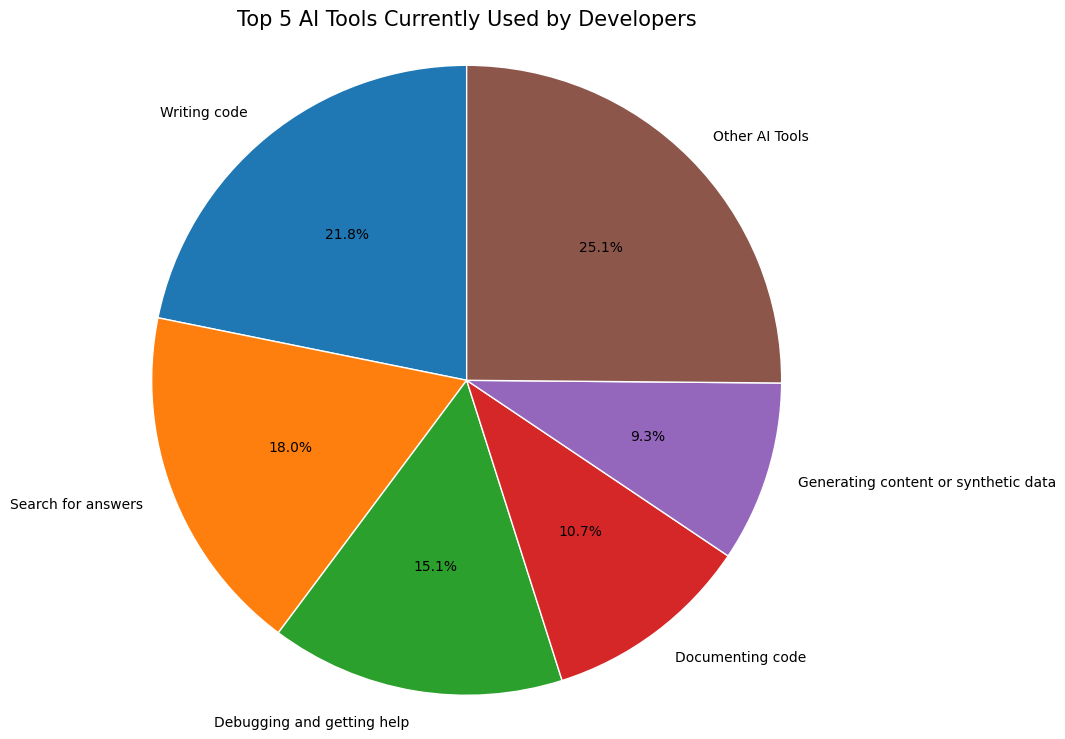

In [10]:
##Write your code here
# --- Pie Chart of Top 5 AI Tools Currently Used ---
print("\n--- Generating: Pie Chart - Top 5 AI Tools Currently Using ---")

ai_tool_col = 'AIToolCurrently Using'

if ai_tool_col in df.columns:

    # 1. Prepare Data
    # Select the column, ensure string type, and drop missing values
    ai_tool_data = df[ai_tool_col].dropna().astype(str)

    # 2. Split and Explode the lists of AI tools
    # Check if splitting is necessary (some columns might have single entries)
    # We assume it might be multi-select based on other columns
    if ai_tool_data.str.contains(';').any():
        print("Splitting multiple tools listed per respondent...")
        tool_split = ai_tool_data.str.split(';')
        tool_individual = tool_split.explode()
    else:
        # If no semicolons, assume single entry per row
        print("Assuming single tool listed per respondent...")
        tool_individual = ai_tool_data

    # 3. Clean individual tool names
    tool_individual = tool_individual.str.strip()
    # Remove empty strings and potential 'nan' strings
    tool_individual = tool_individual[(tool_individual != '') & (tool_individual.str.lower() != 'nan')]
    print(f"Total individual AI tool (currently using) entries counted: {len(tool_individual)}")

    # 4. Count the frequency of each AI tool
    ai_tool_counts = tool_individual.value_counts()

    # 5. Identify Top 5 and Calculate "Others"
    top_n = 5
    if len(ai_tool_counts) > top_n:
        top_ai_tools = ai_tool_counts.nlargest(top_n)
        # Sum frequencies of all tools NOT in the top N
        others_count = ai_tool_counts.iloc[top_n:].sum()
        # Create data for the pie chart
        pie_data_ai_tools = pd.concat([top_ai_tools, pd.Series({'Other AI Tools': others_count})])
        print(f"\nTop {top_n} AI Tools Currently Using (plus Others):")
        print(pie_data_ai_tools)
    elif len(ai_tool_counts) > 0:
         # Handle case where there are <= top_n tools total
        pie_data_ai_tools = ai_tool_counts
        print(f"\nFound {len(pie_data_ai_tools)} AI Tools Currently Using (fewer than {top_n}):")
        print(pie_data_ai_tools)
    else:
        pie_data_ai_tools = pd.Series() # Empty series
        print("No valid AI tool (currently using) entries found to plot.")


    # 6. Create the Pie Chart
    if not pie_data_ai_tools.empty:
        plt.figure(figsize=(11, 9)) # Adjust size
        wedges, texts, autotexts = plt.pie(
            pie_data_ai_tools,
            labels=pie_data_ai_tools.index,
            autopct='%1.1f%%',
            startangle=90,
            wedgeprops={'edgecolor': 'white'},
             textprops={'fontsize': 10}
        )
        plt.title(f'Top {min(top_n, len(ai_tool_counts))} AI Tools Currently Used by Developers', fontsize=15)
        plt.ylabel('') # Hide the default y-axis label
        plt.axis('equal') # Ensure the pie chart is circular

        plt.show()
    else:
        print("Skipping pie chart generation as no data is available.")


else:
    print(f"Pie chart skipped: Required column '{ai_tool_col}' not found.")

##### 3.3 Pie Chart for Preferred Web Frameworks


The `WebframeWantToWorkWith` column includes web frameworks that respondents are interested in working with. Visualize the top 5 frameworks in a pie chart.



In [ ]:
##Write your code here

##### 3.4 Pie Chart for Most Desired Embedded Technologies


Using the `EmbeddedWantToWorkWith` column, create a pie chart to show the top 5 most desired embedded technologies that respondents wish to work with.



In [ ]:
##Write your code here

### Summary


After completing this lab, you will be able to:
- Create pie charts to visualize developer preferences across databases, programming languages, AI tools, and cloud platforms.
- Identify trends in technology usage, role distribution, and tool adoption through pie charts.
- Analyze and compare data composition across various categories to gain insights into developer preferences.




## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
